In [1]:
import shutil

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Bacterial_spot"
destination_dir = "/kaggle/working/Tomato___Bacterial_spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Early_blight"
destination_dir = "/kaggle/working/Tomato___Early_blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Late_blight"
destination_dir = "/kaggle/working/Tomato___Late_blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Leaf_Mold"
destination_dir = "/kaggle/working/Tomato___Leaf_Mold"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Septoria_leaf_spot"
destination_dir = "/kaggle/working/Tomato___Septoria_leaf_spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Spider_mites Two-spotted_spider_mite"
destination_dir = "/kaggle/working/Tomato___Spider_mites Two-spotted_spider_mite"
shutil.copytree(source_dir, destination_dir)


source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus"
destination_dir = "/kaggle/working/Tomato___Tomato_Yellow_Leaf_Curl_Virus"
shutil.copytree(source_dir, destination_dir)


source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Target_Spot"
destination_dir = "/kaggle/working/Tomato___Target_Spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Tomato_mosaic_virus"
destination_dir = "/kaggle/working/Tomato___Tomato_mosaic_virus"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___healthy"
destination_dir = "/kaggle/working/Tomato___healthy"
shutil.copytree(source_dir, destination_dir)

'/kaggle/working/Tomato___healthy'

In [2]:
import os

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical, plot_model


2024-05-31 18:05:07.974856: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 18:05:07.974983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 18:05:08.102337: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
data_path='/kaggle/working/'

In [6]:
def create_dataframe(data_path):
    filepaths = []
    labels = []

    for fold in os.listdir(data_path):
        f_path = os.path.join(data_path, fold)
        if os.path.isdir(f_path):
            imgs = os.listdir(f_path)
            for img in imgs:
                img_path = os.path.join(f_path, img)
                filepaths.append(img_path)
                labels.append(fold)

    fseries = pd.Series(filepaths, name='Filepaths')
    lseries = pd.Series(labels, name='Labels')
    return pd.concat([fseries, lseries], axis=1)

# Create DataFrame for the dataset
df = create_dataframe(data_path)

In [7]:
df

,Filepaths,Labels
0,/kaggle/working/Tomato___healthy/e84eced1-c0a4...,Tomato___healthy
1,/kaggle/working/Tomato___healthy/11fe6fbc-a1a9...,Tomato___healthy
2,/kaggle/working/Tomato___healthy/bd7ec723-4020...,Tomato___healthy
3,/kaggle/working/Tomato___healthy/b2e63ab4-09d6...,Tomato___healthy
4,/kaggle/working/Tomato___healthy/a261cf1c-0bf5...,Tomato___healthy
...,...,...
18155,/kaggle/working/Tomato___Tomato_mosaic_virus/8...,Tomato___Tomato_mosaic_virus
18156,/kaggle/working/Tomato___Tomato_mosaic_virus/0...,Tomato___Tomato_mosaic_virus
18157,/kaggle/working/Tomato___Tomato_mosaic_virus/b...,Tomato___Tomato_mosaic_virus
18158,/kaggle/working/Tomato___Tomato_mosaic_virus/8...,Tomato___Tomato_mosaic_virus


In [8]:
# Step 1: Split into 70% training and 30% dummy
train_df, dummy_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=42)

# Step 2: Split dummy_df into 20% testing and 10% validation
test_df, valid_df = train_test_split(dummy_df, train_size=2/3, shuffle=True, random_state=42)

In [9]:
print(train_df.shape)
print(dummy_df.shape)
print(valid_df.shape)
print(test_df.shape)

(12712, 2)
(5448, 2)
(1816, 2)
(3632, 2)


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 12712 validated image filenames belonging to 10 classes.
Found 1816 validated image filenames belonging to 10 classes.
Found 3632 validated image filenames belonging to 10 classes.


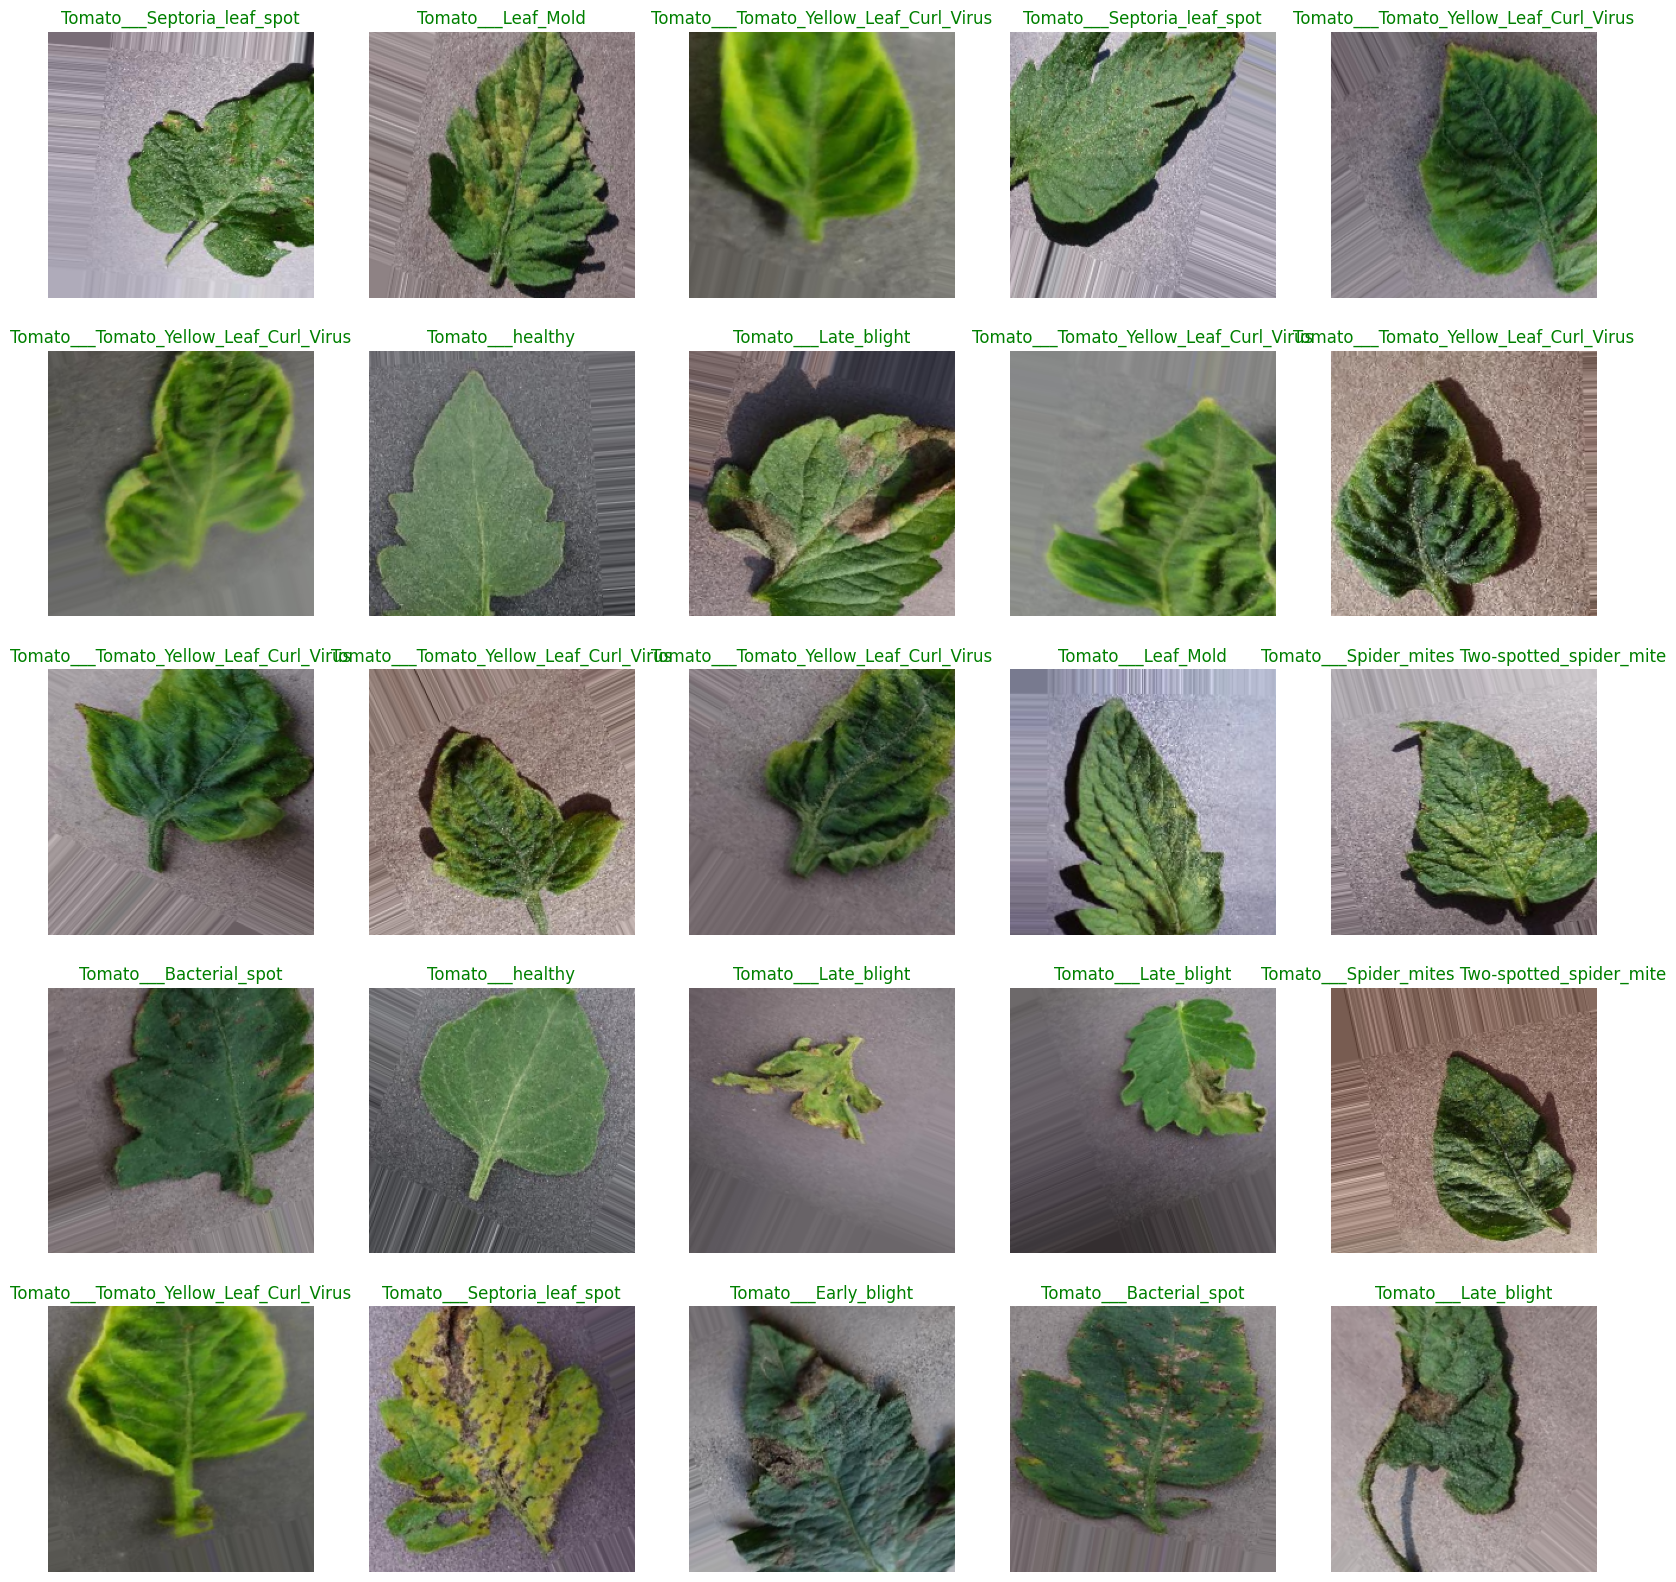

In [12]:
def show_images(image_gen):
    class_dict = image_gen.class_indices
    classes = list(class_dict.keys())
    
    images, labels = next(image_gen)
    
    plt.figure(figsize=(20, 20))
    
    num_images = min(len(labels), 25)
    
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        
        image = images[i]
        
        plt.imshow(image)
        
        index = np.argmax(labels[i])
        class_name = classes[index]
        
        plt.title(class_name, color="green", fontsize=12)
        plt.axis('off')
    
    plt.show()

show_images(train_generator)

In [24]:

input_shape = (224, 224, 3)  
n_classes = len(train_generator.class_indices)

model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),

    keras.layers.Dense(n_classes, activation='softmax')
])


model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 73, 73, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,314 (4.77 MB)

 Trainable params: 1,250,314 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Fit the model
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=valid_generator,
    epochs=50
)

Epoch 1/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 150s 361ms/step - accuracy: 0.3367 - loss: 1.8780 - val_accuracy: 0.4747 - val_loss: 1.4951
Epoch 2/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 145s 359ms/step - accuracy: 0.4805 - loss: 1.4958 - val_accuracy: 0.6278 - val_loss: 1.1626
Epoch 3/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 144s 357ms/step - accuracy: 0.6442 - loss: 1.0168 - val_accuracy: 0.7698 - val_loss: 0.6387
Epoch 4/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 144s 356ms/step - accuracy: 0.7488 - loss: 0.7053 - val_accuracy: 0.7825 - val_loss: 0.5978
Epoch 5/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 146s 360ms/step - accuracy: 0.8381 - loss: 0.4696 - val_accuracy: 0.8756 - val_loss: 0.3388
Epoch 7/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 142s 351ms/step - accuracy: 0.8724 - loss: 0.3681 - val_accuracy: 0.8943 - val_loss: 0.3024
Epoch 8/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 143s 353ms/step - accuracy: 0.8777 - loss: 0.3608 - val_accuracy: 0.9130 - val_loss: 0.2508
Epoch 9/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 142s 350ms/step - accuracy: 0.8849 -

In [26]:
scores = model.evaluate(test_generator)
scores

114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9705 - loss: 0.0864


[0.08830305933952332, 0.9705396294593811]

In [27]:
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step


In [28]:
from sklearn.metrics import classification_report  

class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.92      1.00      0.96       459
                        Tomato___Early_blight       0.95      0.91      0.93       201
                         Tomato___Late_blight       0.98      0.96      0.97       396
                           Tomato___Leaf_Mold       0.98      0.94      0.96       198
                  Tomato___Septoria_leaf_spot       0.96      0.98      0.97       334
Tomato___Spider_mites Two-spotted_spider_mite       0.98      0.95      0.97       323
                         Tomato___Target_Spot       0.93      0.93      0.93       291
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.99      1.00      1040
                 Tomato___Tomato_mosaic_virus       1.00      0.93      0.96        85
                             Tomato___healthy       0.99      0.98      0.99       305

                                     accu

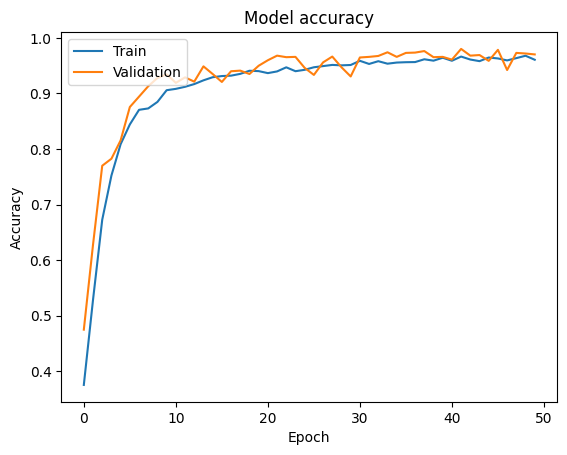

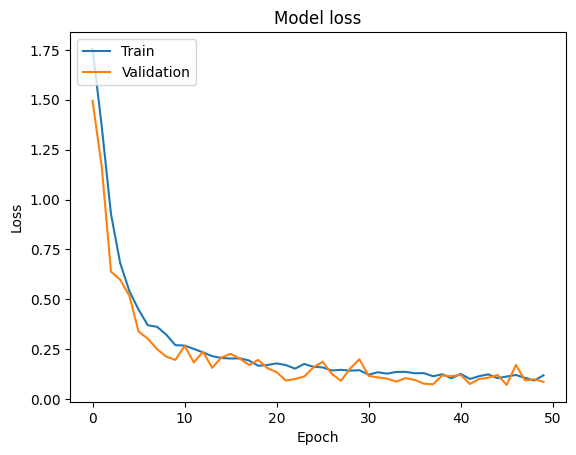

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:

class_names = list(test_generator.class_indices.keys())


images_batch, labels_batch = next(test_generator)

first_image = images_batch[0]
first_label = np.argmax(labels_batch[0])  
batch_prediction = model.predict(images_batch)
predicted_label_index = np.argmax(batch_prediction[0])

print("Actual label:", class_names[first_label])
print("Predicted label:", class_names[predicted_label_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
Actual label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Predicted label: Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

for images_batch, labels_batch in test_generator:
    for i in range(min(len(images_batch), 9)):
        predicted_class, confidence = predict(model, images_batch[i])
        actual_class = class_names[np.argmax(labels_batch[i])] 
        
        print(f"Actual: {actual_class}, Predicted: {predicted_class}, Confidence: {confidence}%")
        
    break 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Actual: Tomato___healthy, Predicted: Tomato___healthy, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Actual: Tomato___Septoria_leaf_spot, Predicted: Tomato___Target_Spot, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Actual: Tomato___Bacterial_spot, Predicted: Tomato___Target_Spot, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Actual: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Predicted: Tomato___Late_blight, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Actual: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Predicted: Tomato___Target_Spot, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Actual: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Predicted: Tomato___Target_Spot, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Actual: Tomato___healthy, Predicted: Tomato___healthy, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Actual: Tomato___healthy, Predicted: Tomato___healthy, Confidence: 100.0%


In [39]:
model.save("Model_T_v2.h5")